In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
def plot(x, y, xgrad, xlabel, ylabel, xgradlabel, label):
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].plot(x, y)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].legend([label])
    
    ax[1].plot(x, xgrad)
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel(ylabel)
    # ax[1].legend([label])
    plt.show()

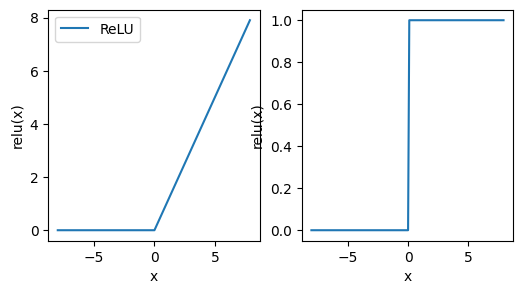

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x), retain_graph=True)

# 这个参数是一个权重张量，用于指定在反向传播过程中计算梯度时的权重。
# 该张量的形状与x相同，所有的元素都被设置为1。
# 在反向传播过程中，PyTorch会使用这个权重张量来加权计算梯度，默认情况下，每个元素的权重都是1。
# retain_graph=True：
# 这个参数告诉PyTorch在进行反向传播后是否保留计算图。
# 默认情况下，PyTorch在调用backward()方法后会自动清除计算图，以释放内存并准备下一次计算。但是在一些情况下，比如需要多次进行反向传播（比如在使用自定义损失函数时）或者需要多次使用相同的计算图进行梯度计算时，我们需要将retain_graph设置为True，以便保留计算图。
# 如果不设置retain_graph=True，那么在第一次调用backward()后，再次调用backward()时会抛出一个错误，因为默认情况下，计算图已经被清除了。
plot(x.detach(), y.detach(), x.grad, 'x', 'relu(x)', 'grad of relu', 'ReLU')

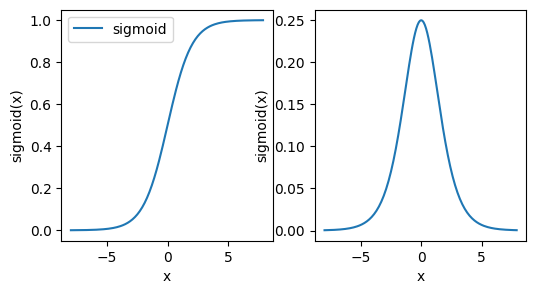

In [4]:
y = torch.sigmoid(x)
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plot(x.detach(), y.detach(), x.grad, 'x', 'sigmoid(x)', 'grad of sigmoid', 'sigmoid')

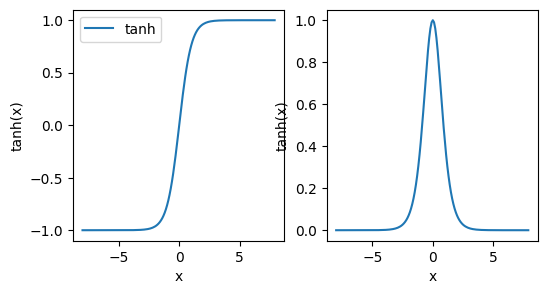

In [5]:
y = torch.tanh(x)
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plot(x.detach(), y.detach(), x.grad, 'x', 'tanh(x)', 'grad of tanh', 'tanh')